In [4]:
import pandas as pd # standard
import numpy as np # standard

import matplotlib.pyplot as plt
import seaborn as sns

import thermogram_utilities

import warnings
warnings.filterwarnings("ignore")

In [5]:
prev = pd.read_excel("/Users/avery/OneDrive/Documents/GitHub/Clinical_TLB_2023-2024/lung_cancer_tlb.xlsx")
update = pd.read_excel('/Users/avery/OneDrive/Documents/publication_meta_data.xlsx')
merged = pd.merge(prev, update, left_on='pub_id', right_on="Patient")
df = merged.drop(["CancerType", "sample_id", "pub_id", "Patient"], axis = 1)

In [6]:
# get location of cut off values
lower_column_index = df.columns.get_loc("T51")
upper_column_index = df.columns.get_loc("T83.1")
label_column_index = df.columns.get_loc("Diagnosis")
cancer_column_index = df.columns.get_loc("Stage")
column_indices = np.arange(lower_column_index, upper_column_index)
column_indices = np.append(column_indices, cancer_column_index)
column_indices = np.append(column_indices, label_column_index)

df = df.iloc[:, column_indices]

In [7]:
cancer_type = "Control"
prediction_df = df.loc[df["Diagnosis"] != cancer_type]
#prediction_df["Stage"] = np.where(prediction_df["Stage"] == "Early", 0, 1)

prediction_df["Cancer and Stage"] = prediction_df["Diagnosis"] + "_" + prediction_df["Stage"]
prediction_df = prediction_df.drop(["Diagnosis", "Stage"], axis = 1)


In [8]:
df_long = pd.melt(prediction_df, id_vars=['Cancer and Stage'], var_name='temp', value_name='dsp' )

median = thermogram_utilities.median_curve(df_long, 'Cancer and Stage', 'temp', 'dsp')

median['temperature'] = median['temperature'].str.replace('T', '').astype(float)

Text(0.5, 1.0, 'Median Lung Cancer Thermograms by Stage')

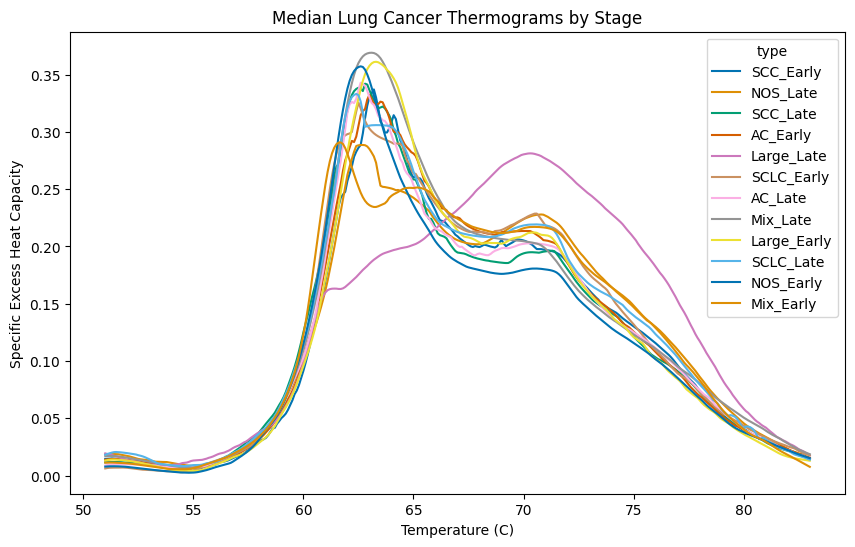

In [9]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.lineplot(data=median, x='temperature', y='median', hue='type', palette='colorblind')
plt.xlabel('Temperature (C)')
plt.ylabel('Specific Excess Heat Capacity')
plt.title('Median Lung Cancer Thermograms by Stage')

Text(0, 0.5, 'Meadian Specific Excess Heat Capacity')

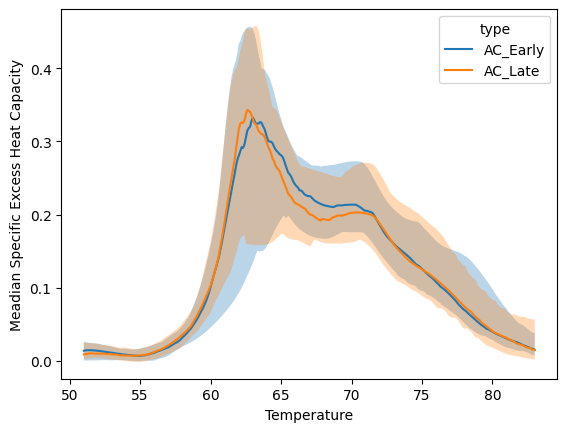

In [10]:
# adenocarcinoma: early vs late
cancer_type_1 = "AC_Early"
cancer_type_2 = "AC_Late"

graph_df = median[(median["type"] == cancer_type_1) | (median["type"] == cancer_type_2)]


# Create a line plot using Seaborn with matching colors
sns.lineplot(data=graph_df, x='temperature', y='median', hue='type')

# Create separate ribbons for each "type" with matching colors
for type_name in graph_df['type'].unique():
    type_data = graph_df[graph_df['type'] == type_name]
    plt.fill_between(type_data["temperature"], type_data["lower_q"], type_data["upper_q"], alpha=0.3, label=type_name)

plt.xlabel("Temperature")
plt.ylabel("Meadian Specific Excess Heat Capacity")


In [11]:
# adeno vs sclc results
adeno_stage = pd.read_excel("AC_Stage_Results.xlsx")

adeno_stage['max_depth'] = np.where(pd.isna(adeno_stage['max_depth']), "None", adeno_stage["max_depth"])
adeno_stage['max_features'] = np.where(pd.isna(adeno_stage['max_features']), "None", adeno_stage["max_features"])

adeno_stage_results = adeno_stage.groupby(['n_estimators', 'max_depth', 'max_features'], as_index = False).mean().sort_values("Weighted Accuracy", ascending=False)


Text(0, 0.5, 'Meadian Specific Excess Heat Capacity')

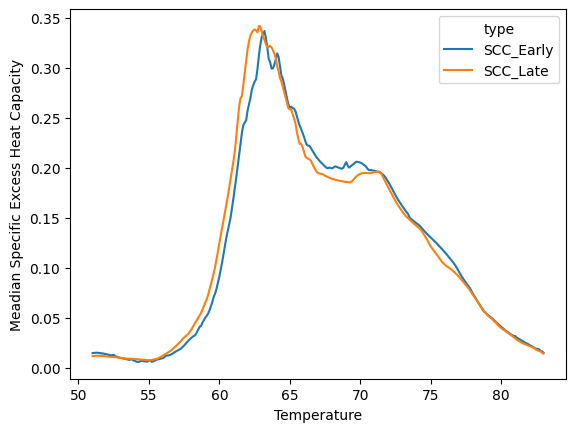

In [12]:
# SCC: early vs late
cancer_type_1 = "SCC_Early"
cancer_type_2 = "SCC_Late"

graph_df = median[(median["type"] == cancer_type_1) | (median["type"] == cancer_type_2)]


# Create a line plot using Seaborn with matching colors
sns.lineplot(data=graph_df, x='temperature', y='median', hue='type')

# Create separate ribbons for each "type" with matching colors
'''for type_name in graph_df['type'].unique():
    type_data = graph_df[graph_df['type'] == type_name]
    plt.fill_between(type_data["temperature"], type_data["lower_q"], type_data["upper_q"], alpha=0.3, label=type_name)
'''
plt.xlabel("Temperature")
plt.ylabel("Meadian Specific Excess Heat Capacity")

In [13]:
scc_stage = pd.read_excel("SCC_Stage_Results.xlsx")

scc_stage['max_depth'] = np.where(pd.isna(scc_stage['max_depth']), "None", scc_stage["max_depth"])
scc_stage['max_features'] = np.where(pd.isna(scc_stage['max_features']), "None", scc_stage["max_features"])

scc_stage_results = scc_stage.groupby(['n_estimators', 'max_depth', 'max_features'], as_index = False).mean().sort_values("Weighted Accuracy", ascending=False)
scc_stage_results

,n_estimators,max_depth,max_features,Weighted Accuracy,AUC
19,1000,23.0,log2,0.508604,0.505465
22,1000,None,log2,0.507866,0.505197
4,100,None,log2,0.507601,0.505052
1,100,23.0,log2,0.507088,0.503352
16,500,None,log2,0.506661,0.506488
7,250,23.0,log2,0.505944,0.504251
10,250,None,log2,0.505291,0.504999
13,500,23.0,log2,0.505136,0.506358
14,500,23.0,sqrt,0.501645,0.501663
20,1000,23.0,sqrt,0.501031,0.500505


Text(0, 0.5, 'Median Specific Excess Heat Capacity')

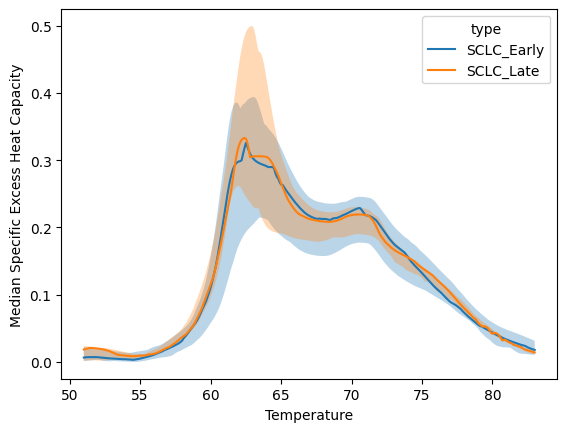

In [14]:
# SCC: early vs late
cancer_type_1 = "SCLC_Early"
cancer_type_2 = "SCLC_Late"

graph_df = median[(median["type"] == cancer_type_1) | (median["type"] == cancer_type_2)]


# Create a line plot using Seaborn with matching colors
sns.lineplot(data=graph_df, x='temperature', y='median', hue='type')

# Create separate ribbons for each "type" with matching colors
for type_name in graph_df['type'].unique():
    type_data = graph_df[graph_df['type'] == type_name]
    plt.fill_between(type_data["temperature"], type_data["lower_q"], type_data["upper_q"], alpha=0.3, label=type_name)

plt.xlabel("Temperature")
plt.ylabel("Median Specific Excess Heat Capacity")

In [15]:
sclc_stage = pd.read_excel("SCC_Stage_Results.xlsx")

sclc_stage['max_depth'] = np.where(pd.isna(sclc_stage['max_depth']), "None", sclc_stage["max_depth"])
sclc_stage['max_features'] = np.where(pd.isna(sclc_stage['max_features']), "None", sclc_stage["max_features"])

sclc_stage_results = sclc_stage.groupby(['n_estimators', 'max_depth', 'max_features'], as_index = False).mean().sort_values("Weighted Accuracy", ascending=False)
sclc_stage_results

,n_estimators,max_depth,max_features,Weighted Accuracy,AUC
19,1000,23.0,log2,0.508604,0.505465
22,1000,None,log2,0.507866,0.505197
4,100,None,log2,0.507601,0.505052
1,100,23.0,log2,0.507088,0.503352
16,500,None,log2,0.506661,0.506488
7,250,23.0,log2,0.505944,0.504251
10,250,None,log2,0.505291,0.504999
13,500,23.0,log2,0.505136,0.506358
14,500,23.0,sqrt,0.501645,0.501663
20,1000,23.0,sqrt,0.501031,0.500505


In [16]:
cancer_type = "Control"
prediction_df = df.loc[df["Diagnosis"] != cancer_type]
#prediction_df["Stage"] = np.where(prediction_df["Stage"] == "Early", 0, 1)

#prediction_df["Cancer and Stage"] = prediction_df["Diagnosis"] + "_" + prediction_df["Stage"]
prediction_df = prediction_df.drop(["Diagnosis"], axis = 1)


df_long = pd.melt(prediction_df, id_vars=['Stage'], var_name='temp', value_name='dsp' )

median = thermogram_utilities.median_curve(df_long, 'Stage', 'temp', 'dsp')

median['temperature'] = median['temperature'].str.replace('T', '').astype(float)



Text(0, 0.5, 'Meadian Specific Excess Heat Capacity')

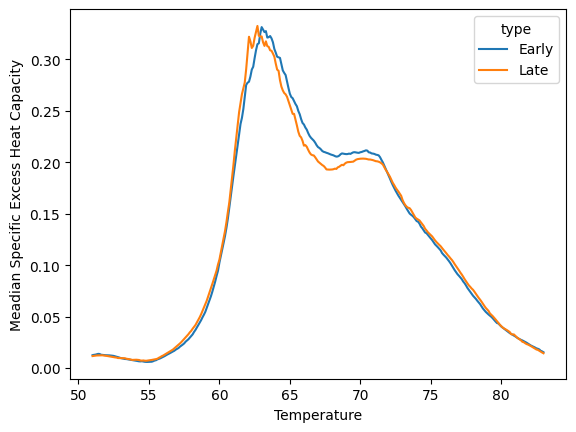

In [17]:
graph_df = median
# Create a line plot using Seaborn with matching colors
sns.lineplot(data=graph_df, x='temperature', y='median', hue='type')

# Create separate ribbons for each "type" with matching colors
'''for type_name in graph_df['type'].unique():
    type_data = graph_df[graph_df['type'] == type_name]
    plt.fill_between(type_data["temperature"], type_data["lower_q"], type_data["upper_q"], alpha=0.3, label=type_name)
'''
plt.xlabel("Temperature")
plt.ylabel("Meadian Specific Excess Heat Capacity")

In [18]:
all_stage = pd.read_excel("ALL_Stage_Results.xlsx")

all_stage['max_depth'] = np.where(pd.isna(all_stage['max_depth']), "None", all_stage["max_depth"])
all_stage['max_features'] = np.where(pd.isna(all_stage['max_features']), "None", all_stage["max_features"])

all_stage_results = all_stage.groupby(['n_estimators', 'max_depth', 'max_features'], as_index = False).mean().sort_values("Weighted Accuracy", ascending=False)
all_stage_results

,n_estimators,max_depth,max_features,Weighted Accuracy,AUC
8,250,74.0,sqrt,0.544999,0.561948
15,500,None,None,0.544723,0.560832
23,1000,None,sqrt,0.544414,0.562680
20,1000,74.0,sqrt,0.544325,0.563296
16,500,None,log2,0.543799,0.562731
12,500,74.0,None,0.543614,0.559947
6,250,74.0,None,0.543485,0.559607
18,1000,74.0,None,0.543387,0.560408
14,500,74.0,sqrt,0.543377,0.562651
21,1000,None,None,0.543317,0.560060


In [20]:
results = pd.concat([adeno_stage_results.head(1), scc_stage_results.head(1), sclc_stage_results.head(1), all_stage_results.head(1)], ignore_index=True)
#results = results.drop("Type", axis=1)
results.insert(0, "Type", ["AC", "SCC", "SCLC", "All"])
results.drop(["n_estimators", "max_depth", "max_features"], axis = 1)

,Type,Weighted Accuracy,AUC
0,AC,0.550638,0.584997
1,SCC,0.508604,0.505465
2,SCLC,0.508604,0.505465
3,All,0.544999,0.561948
